# Análise de Dados - UFPB

# Laboratório: Regressão

Você deve usar os dados das eleições do TSE para entender os fatores que influenciam a votação dos candidatos usando modelos de regressão e outras análises estatísticas. Nesta atividade, vocês devem concentrar a análise em candidatos a deputado estadual na Paraíba em 2022. Os dados que combinam informações de votação, receitas de campanha e bens dos candidatos estão no arquivo `dados/eleicao_2022_pb_deputado_estadual.csv`. A análise deve ser feita neste relatório Jupyter Notebook. O relatório já possui algumas perguntas a serem respondidas. Use as perguntas como base, mas não fique preso a elas. Você pode fazer novas perguntas e novas análises à vontade.

## Carregamento dos dados

In [95]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statistics import mode
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, r2_score

candidatos = pd.read_csv('dados/eleicao_2022_pb_deputado_estadual.csv')
candidatos

,SQ_CANDIDATO,ANO_ELEICAO,SG_UF,DS_CARGO,NR_CANDIDATO,NM_URNA_CANDIDATO,SG_PARTIDO,DT_NASCIMENTO,NR_IDADE_DATA_POSSE,DS_GENERO,DS_GRAU_INSTRUCAO,DS_ESTADO_CIVIL,DS_COR_RACA,DS_OCUPACAO,VR_DESPESA_MAX_CAMPANHA,DS_SIT_TOT_TURNO,QT_VOTOS,VR_RECEITA,VR_BEM_CANDIDATO
0,150001643207,2022,PB,DEPUTADO ESTADUAL,13999,NAL DA BANCA,PT,30/11/1983,39,MASCULINO,ENSINO MÉDIO COMPLETO,SOLTEIRO(A),BRANCA,COMERCIANTE,1270629.01,SUPLENTE,331.0,6000.00,NaN
1,150001718492,2022,PB,DEPUTADO ESTADUAL,36013,NILDÃO É POVÃO,AGIR,22/04/1961,61,MASCULINO,SUPERIOR COMPLETO,CASADO(A),PARDA,ADMINISTRADOR,1270629.01,NÃO ELEITO,123.0,1347.25,200000.00
2,150001718098,2022,PB,DEPUTADO ESTADUAL,15789,ANDRE GADELHA,MDB,10/04/1975,47,MASCULINO,SUPERIOR COMPLETO,CASADO(A),PARDA,ADMINISTRADOR,1270629.01,SUPLENTE,18374.0,168500.00,1387610.47
3,150001718219,2022,PB,DEPUTADO ESTADUAL,22122,CICINHO LIMA,PL,04/09/1974,48,MASCULINO,ENSINO MÉDIO COMPLETO,CASADO(A),PRETA,CANTOR E COMPOSITOR,1270629.01,SUPLENTE,15703.0,226765.60,NaN
4,150001621356,2022,PB,DEPUTADO ESTADUAL,45745,ROSA TORREÃO,PSDB,26/07/1980,42,FEMININO,ENSINO FUNDAMENTAL INCOMPLETO,CASADO(A),PARDA,CABELEIREIRO E BARBEIRO,1270629.01,SUPLENTE,163.0,31500.00,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456,150001718225,2022,PB,DEPUTADO ESTADUAL,22300,WELLINGTON CARNEIRO,PL,02/07/1969,53,MASCULINO,SUPERIOR COMPLETO,SOLTEIRO(A),PARDA,OUTROS,1270629.01,SUPLENTE,182.0,15000.00,NaN
457,150001603148,2022,PB,DEPUTADO ESTADUAL,44112,PASTOR PAULINHO PAZ,UNIÃO,28/03/1985,37,MASCULINO,SUPERIOR INCOMPLETO,CASADO(A),BRANCA,OUTROS,1270629.01,NÃO ELEITO,90.0,NaN,NaN
458,150001718212,2022,PB,DEPUTADO ESTADUAL,22001,PROF SGT JOELSON,PL,15/03/1963,59,MASCULINO,SUPERIOR COMPLETO,CASADO(A),PARDA,OUTROS,1270629.01,SUPLENTE,2228.0,15011.65,22000.00
459,150001725483,2022,PB,DEPUTADO ESTADUAL,12321,CONCEIÇÃO OLIVEIRA,PDT,08/12/1995,27,FEMININO,ENSINO MÉDIO COMPLETO,SOLTEIRO(A),PARDA,"ESTUDANTE, BOLSISTA, ESTAGIÁRIO E ASSEMELHADOS",1270629.01,#NULO#,NaN,NaN,NaN


## 1 Análise exploratória de dados

Inicialmente, faça uma análise exploratória das variáveis que você considerar mais importantes para a análise.

### 1.1 Análise por gênero

#### 1.1.1 Quantidade de candidatos por gênero

In [96]:
candidatos[['DS_GENERO']].value_counts()

DS_GENERO
MASCULINO    300
FEMININO     161
Name: count, dtype: int64

#### 1.1.2 Verificando a quantidade de candidatos eleitos por gênero

In [97]:
eleitos_qt_media = candidatos[(candidatos['DS_SIT_TOT_TURNO'] == 'ELEITO POR QP') | (candidatos['DS_SIT_TOT_TURNO'] == 'ELEITO POR MÉDIA')]
generoEleitos = eleitos_qt_media['DS_GENERO'].value_counts()
print(generoEleitos)

DS_GENERO
MASCULINO    30
FEMININO      6
Name: count, dtype: int64


#### 1.1.3 Média de dados importantes entre cadidatos por gênero

In [98]:
colunas_excluir = ['SQ_CANDIDATO', 'ANO_ELEICAO', 'NR_CANDIDATO', 'VR_DESPESA_MAX_CAMPANHA']
dados_selecionados = candidatos.drop(columns=colunas_excluir)

mediaGenero = dados_selecionados.groupby(["DS_GENERO"]).mean('QT_VOTOS').apply(lambda x: round(x, 2))
print(mediaGenero)


           NR_IDADE_DATA_POSSE  QT_VOTOS  VR_RECEITA  VR_BEM_CANDIDATO
DS_GENERO                                                             
FEMININO                 45.55   3013.74    93170.92         551117.48
MASCULINO                48.31   5908.35    79321.60        1053419.30


##### Gráfico 1.1

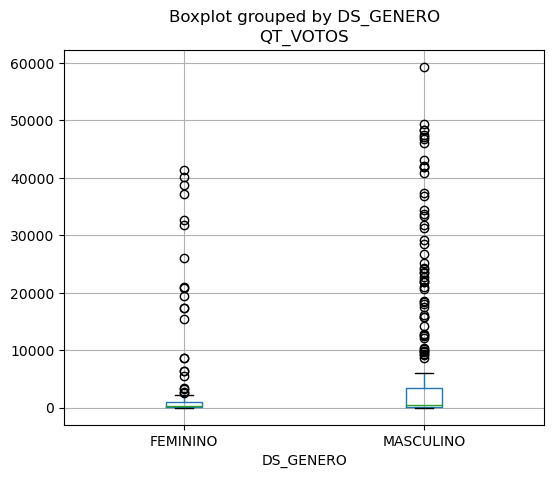

In [99]:
ax = candidatos.boxplot(by='DS_GENERO',
  column='QT_VOTOS', figsize=(6, 5))

#### 1.1.4 Medidas de centralidade e variância dos candidatos por gênero

* Homens

In [100]:
candidatosHomens = candidatos[candidatos['DS_GENERO']=='MASCULINO']
media = np.mean(candidatosHomens['QT_VOTOS'])
mediana = np.median(candidatosHomens['QT_VOTOS'])
moda = mode(candidatosHomens['QT_VOTOS'])
variancia = np.var(candidatosHomens['QT_VOTOS'])
desvio_padrao = np.std(candidatosHomens['QT_VOTOS'])

resultados = (
    "Medidas de Centralidade:\n"
    f"Média: {media:.2f}\n"
    f"Mediana: {mediana}\n"
    f"Moda: {moda}\n\n"
    "Medidas de Dispersão:\n"
    f"Variância: {variancia:.2f}\n"
    f"Desvio Padrão: {desvio_padrao:.2f}\n"
)
print(resultados)

Medidas de Centralidade:
Média: 5908.35
Mediana: nan
Moda: 6.0

Medidas de Dispersão:
Variância: 140903870.18
Desvio Padrão: 11870.29



* Mulheres

In [101]:
candidatasMulheres = candidatos[candidatos['DS_GENERO']=='FEMININO']
media = np.mean(candidatasMulheres['QT_VOTOS'])
mediana = np.median(candidatasMulheres['QT_VOTOS'])
moda = mode(candidatasMulheres['QT_VOTOS'])
variancia = np.var(candidatasMulheres['QT_VOTOS'])
desvio_padrao = np.std(candidatasMulheres['QT_VOTOS'])

resultados = (
    "Medidas de Centralidade:\n"
    f"Média: {media:.2f}\n"
    f"Mediana: {mediana}\n"
    f"Moda: {moda}\n\n"
    "Medidas de Dispersão:\n"
    f"Variância: {variancia:.2f}\n"
    f"Desvio Padrão: {desvio_padrao:.2f}\n"
)
print(resultados)

Medidas de Centralidade:
Média: 3013.74
Mediana: nan
Moda: 22.0

Medidas de Dispersão:
Variância: 65927827.30
Desvio Padrão: 8119.60



### 1.2 Análise por cor ou raça

#### 1.2.1 Quantidade de candidatos por cor ou raça

In [102]:
candidatos[['DS_COR_RACA']].value_counts()

DS_COR_RACA
PARDA          229
BRANCA         165
PRETA           64
INDÍGENA         2
AMARELA          1
Name: count, dtype: int64

#### 1.2.2 Verificando a quantidade de candidatos eleitos por cor ou raça

In [103]:
racaEleitas = eleitos_qt_media['DS_COR_RACA'].value_counts()
print(racaEleitas)

DS_COR_RACA
BRANCA    23
PARDA     12
PRETA      1
Name: count, dtype: int64


#### 1.2.3 Média de dados importantes entre candidatos com base em sua cor ou raça

In [104]:
disc_media = dados_selecionados.groupby(['DS_COR_RACA']).mean('QT_VOTOS').apply(lambda x: round(x, 2))
print(disc_media)

             NR_IDADE_DATA_POSSE  QT_VOTOS  VR_RECEITA  VR_BEM_CANDIDATO
DS_COR_RACA                                                             
AMARELA                    42.00     45.00    10000.00               NaN
BRANCA                     48.99   7901.92   117763.83         854682.33
INDÍGENA                   48.50    445.00    32399.00               NaN
PARDA                      46.00   3444.10    68911.45         400927.49
PRETA                      47.94   2081.68    56723.64        3812109.47


##### Gráfico 1.2

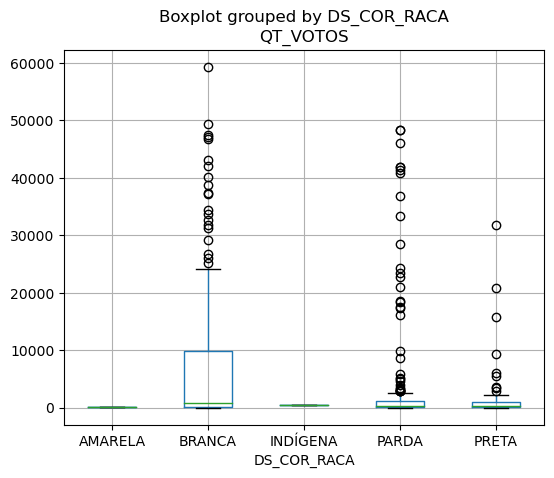

In [105]:
ax = candidatos.boxplot(by='DS_COR_RACA',
  column='QT_VOTOS', figsize=(6, 5))

#### 1.2.4 Medidas de centralidade e variância dos candidatos por cor ou raça

* Pardos

In [106]:
candidatosPardos = candidatos[candidatos['DS_COR_RACA']=='PARDA']
media = np.mean(candidatosPardos['QT_VOTOS'])
mediana = np.median(candidatosPardos['QT_VOTOS'])
moda = mode(candidatosPardos['QT_VOTOS'])
variancia = np.var(candidatosPardos['QT_VOTOS'])
desvio_padrao = np.std(candidatosPardos['QT_VOTOS'])

resultados = (
    "Medidas de Centralidade:\n"
    f"Média: {media:.2f}\n"
    f"Mediana: {mediana}\n"
    f"Moda: {moda}\n\n"
    "Medidas de Dispersão:\n"
    f"Variância: {variancia:.2f}\n"
    f"Desvio Padrão: {desvio_padrao:.2f}\n"
)
print(resultados)

Medidas de Centralidade:
Média: 3444.10
Mediana: nan
Moda: 79.0

Medidas de Dispersão:
Variância: 86458620.26
Desvio Padrão: 9298.31



* Brancos

In [107]:
candidatosBrancos = candidatos[candidatos['DS_COR_RACA']=='BRANCA']
media = np.mean(candidatosBrancos['QT_VOTOS'])
mediana = np.median(candidatosBrancos['QT_VOTOS'])
moda = mode(candidatosBrancos['QT_VOTOS'])
variancia = np.var(candidatosBrancos['QT_VOTOS'])
desvio_padrao = np.std(candidatosBrancos['QT_VOTOS'])

resultados = (
    "Medidas de Centralidade:\n"
    f"Média: {media:.2f}\n"
    f"Mediana: {mediana}\n"
    f"Moda: {moda}\n\n"
    "Medidas de Dispersão:\n"
    f"Variância: {variancia:.2f}\n"
    f"Desvio Padrão: {desvio_padrao:.2f}\n"
)
print(resultados)

Medidas de Centralidade:
Média: 7901.92
Mediana: nan
Moda: 3.0

Medidas de Dispersão:
Variância: 174290220.20
Desvio Padrão: 13201.90



* Pretos

In [108]:
candidatosPretos = candidatos[candidatos['DS_COR_RACA']=='PRETA']
media = np.mean(candidatosPretos['QT_VOTOS'])
mediana = np.median(candidatosPretos['QT_VOTOS'])
moda = mode(candidatosPretos['QT_VOTOS'])
variancia = np.var(candidatosPretos['QT_VOTOS'])
desvio_padrao = np.std(candidatosPretos['QT_VOTOS'])

resultados = (
    "Medidas de Centralidade:\n"
    f"Média: {media:.2f}\n"
    f"Mediana: {mediana}\n"
    f"Moda: {moda}\n\n"
    "Medidas de Dispersão:\n"
    f"Variância: {variancia:.2f}\n"
    f"Desvio Padrão: {desvio_padrao:.2f}\n"
)
print(resultados)

Medidas de Centralidade:
Média: 2081.68
Mediana: nan
Moda: 6.0

Medidas de Dispersão:
Variância: 29491323.72
Desvio Padrão: 5430.59



### 1.3 Análise por ocupação

#### 1.3.1 Quantidade de candidatos por ocupação

In [109]:
candidatos[['DS_OCUPACAO']].value_counts()

DS_OCUPACAO      
OUTROS               85
EMPRESÁRIO           49
ADVOGADO             24
DEPUTADO             21
COMERCIANTE          21
                     ..
PESCADOR              1
PEDAGOGO              1
MILITAR REFORMADO     1
ODONTÓLOGO            1
VIGILANTE             1
Name: count, Length: 77, dtype: int64

#### 1.3.2 Verificando a quantidade de candidatos eleitos por ocupação

In [110]:
ocupacoes_eleitas = eleitos_qt_media['DS_OCUPACAO'].value_counts()
print(ocupacoes_eleitas)

DS_OCUPACAO
DEPUTADO                    16
MÉDICO                       5
EMPRESÁRIO                   4
OUTROS                       3
ADVOGADO                     3
VEREADOR                     2
ADMINISTRADOR                1
FARMACÊUTICO                 1
SERVIDOR PÚBLICO FEDERAL     1
Name: count, dtype: int64


#### 1.3.3 Média dos dados importantes entre os candidatos por ocupação

In [111]:
media_por_ocupacao = eleitos_qt_media.groupby('DS_OCUPACAO').agg({
    'NR_IDADE_DATA_POSSE': 'mean',
    'QT_VOTOS': 'mean',
    'VR_RECEITA': 'mean',
    'VR_BEM_CANDIDATO': 'mean'
})

media_por_ocupacao = media_por_ocupacao.round(2)
print(media_por_ocupacao)

                          NR_IDADE_DATA_POSSE  QT_VOTOS  VR_RECEITA  \
DS_OCUPACAO                                                           
ADMINISTRADOR                           42.00  23577.00    87200.00   
ADVOGADO                                39.00  31775.00   622455.00   
DEPUTADO                                51.62  36681.56   310447.79   
EMPRESÁRIO                              43.50  46242.00   306906.44   
FARMACÊUTICO                            58.00  22272.00    74389.83   
MÉDICO                                  51.60  32141.60   256460.68   
OUTROS                                  61.67  43133.00   360409.86   
SERVIDOR PÚBLICO FEDERAL                42.00  37235.00   370493.79   
VEREADOR                                47.00  31344.50   114313.15   

                          VR_BEM_CANDIDATO  
DS_OCUPACAO                                 
ADMINISTRADOR                    753251.00  
ADVOGADO                         932219.90  
DEPUTADO                        166178

#### 1.3.4 Medidas de centralidade e variância dos candidatos por ocupação

* Deputado

In [112]:
deputado = candidatos[candidatos['DS_OCUPACAO']=='DEPUTADO']
media = np.mean(deputado['QT_VOTOS'])
mediana = np.median(deputado['QT_VOTOS'])
moda = mode(deputado['QT_VOTOS'])
variancia = np.var(deputado['QT_VOTOS'])
desvio_padrao = np.std(deputado['QT_VOTOS'])

resultados = (
    "Medidas de Centralidade:\n"
    f"Média: {media:.2f}\n"
    f"Mediana: {mediana}\n"
    f"Moda: {moda}\n\n"
    "Medidas de Dispersão:\n"
    f"Variância: {variancia:.2f}\n"
    f"Desvio Padrão: {desvio_padrao:.2f}\n"
)
print(resultados)

Medidas de Centralidade:
Média: 32729.40
Mediana: nan
Moda: 33272.0

Medidas de Dispersão:
Variância: 133515549.24
Desvio Padrão: 11554.89



* Médico

In [113]:
medico = candidatos[candidatos['DS_OCUPACAO']=='MÉDICO']
media = np.mean(medico['QT_VOTOS'])
mediana = np.median(medico['QT_VOTOS'])
moda = mode(medico['QT_VOTOS'])
variancia = np.var(medico['QT_VOTOS'])
desvio_padrao = np.std(medico['QT_VOTOS'])

resultados = (
    "Medidas de Centralidade:\n"
    f"Média: {media:.2f}\n"
    f"Mediana: {mediana}\n"
    f"Moda: {moda}\n\n"
    "Medidas de Dispersão:\n"
    f"Variância: {variancia:.2f}\n"
    f"Desvio Padrão: {desvio_padrao:.2f}\n"
)
print(resultados)

Medidas de Centralidade:
Média: 20283.44
Mediana: 22778.0
Moda: 4179.0

Medidas de Dispersão:
Variância: 219486778.25
Desvio Padrão: 14815.09



* Empresário

In [114]:
empresario = candidatos[candidatos['DS_OCUPACAO']=='EMPRESÁRIO']
media = np.mean(empresario['QT_VOTOS'])
mediana = np.median(empresario['QT_VOTOS'])
moda = mode(empresario['QT_VOTOS'])
variancia = np.var(empresario['QT_VOTOS'])
desvio_padrao = np.std(empresario['QT_VOTOS'])

resultados = (
    "Medidas de Centralidade:\n"
    f"Média: {media:.2f}\n"
    f"Mediana: {mediana}\n"
    f"Moda: {moda}\n\n"
    "Medidas de Dispersão:\n"
    f"Variância: {variancia:.2f}\n"
    f"Desvio Padrão: {desvio_padrao:.2f}\n"
)
print(resultados)

Medidas de Centralidade:
Média: 5450.20
Mediana: nan
Moda: 22.0

Medidas de Dispersão:
Variância: 172117565.14
Desvio Padrão: 13119.36



* Outros

In [115]:
outros = candidatos[candidatos['DS_OCUPACAO']=='OUTROS']
media = np.mean(outros['QT_VOTOS'])
mediana = np.median(outros['QT_VOTOS'])
moda = mode(outros['QT_VOTOS'])
variancia = np.var(outros['QT_VOTOS'])
desvio_padrao = np.std(outros['QT_VOTOS'])

resultados = (
    "Medidas de Centralidade:\n"
    f"Média: {media:.2f}\n"
    f"Mediana: {mediana}\n"
    f"Moda: {moda}\n\n"
    "Medidas de Dispersão:\n"
    f"Variância: {variancia:.2f}\n"
    f"Desvio Padrão: {desvio_padrao:.2f}\n"
)
print(resultados)

Medidas de Centralidade:
Média: 2212.09
Mediana: nan
Moda: 162.0

Medidas de Dispersão:
Variância: 68628516.34
Desvio Padrão: 8284.23



### 1.4 Análise por partido político

#### 1.4.1 Quantidade de candidatos por partido

In [116]:
candidatos[['SG_PARTIDO']].value_counts()

SG_PARTIDO   
PMB              44
PL               39
MDB              37
SOLIDARIEDADE    35
PSDB             34
UNIÃO            33
PT               28
DC               26
REDE             25
PSB              24
REPUBLICANOS     22
PTB              20
AGIR             20
PRTB             18
PSD              17
PP               14
PSOL             12
PC do B           6
PDT               4
PROS              2
PV                1
Name: count, dtype: int64

#### 1.4.2 Verificando a quantidade de cadidantos eleitos por partido

In [117]:
partidoEleitos = eleitos_qt_media['SG_PARTIDO'].value_counts()
print(partidoEleitos)

SG_PARTIDO
REPUBLICANOS     8
PSB              6
PP               4
PSDB             3
UNIÃO            3
PL               3
MDB              2
PT               2
SOLIDARIEDADE    2
REDE             1
PSD              1
PC do B          1
Name: count, dtype: int64


#### 1.4.3 Média dos dados importantes entre os candidatos por partido

In [118]:
disc_media = dados_selecionados.groupby(["SG_PARTIDO"]).mean('QT_VOTOS').apply(lambda x: round(x, 2))
print(disc_media)

               NR_IDADE_DATA_POSSE  QT_VOTOS  VR_RECEITA  VR_BEM_CANDIDATO
SG_PARTIDO                                                                
AGIR                         47.60    218.63     1347.25         214090.91
DC                           47.88    256.36    11735.05         246269.23
MDB                          46.35   2901.51    64601.17        5261591.06
PC do B                      50.83   7869.50   126562.50         433750.00
PDT                          42.25    787.00    24555.56         180000.00
PL                           49.51   5285.29    49566.46         430372.30
PMB                          44.48    331.11     4650.00         530921.88
PP                           50.36  16015.93   318830.07         630620.42
PROS                         31.00     21.00         NaN         213476.07
PRTB                         46.78    794.41     5305.97         313344.09
PSB                          53.96  13919.14   111624.43         628624.63
PSD                      

##### Gráfico 1.3

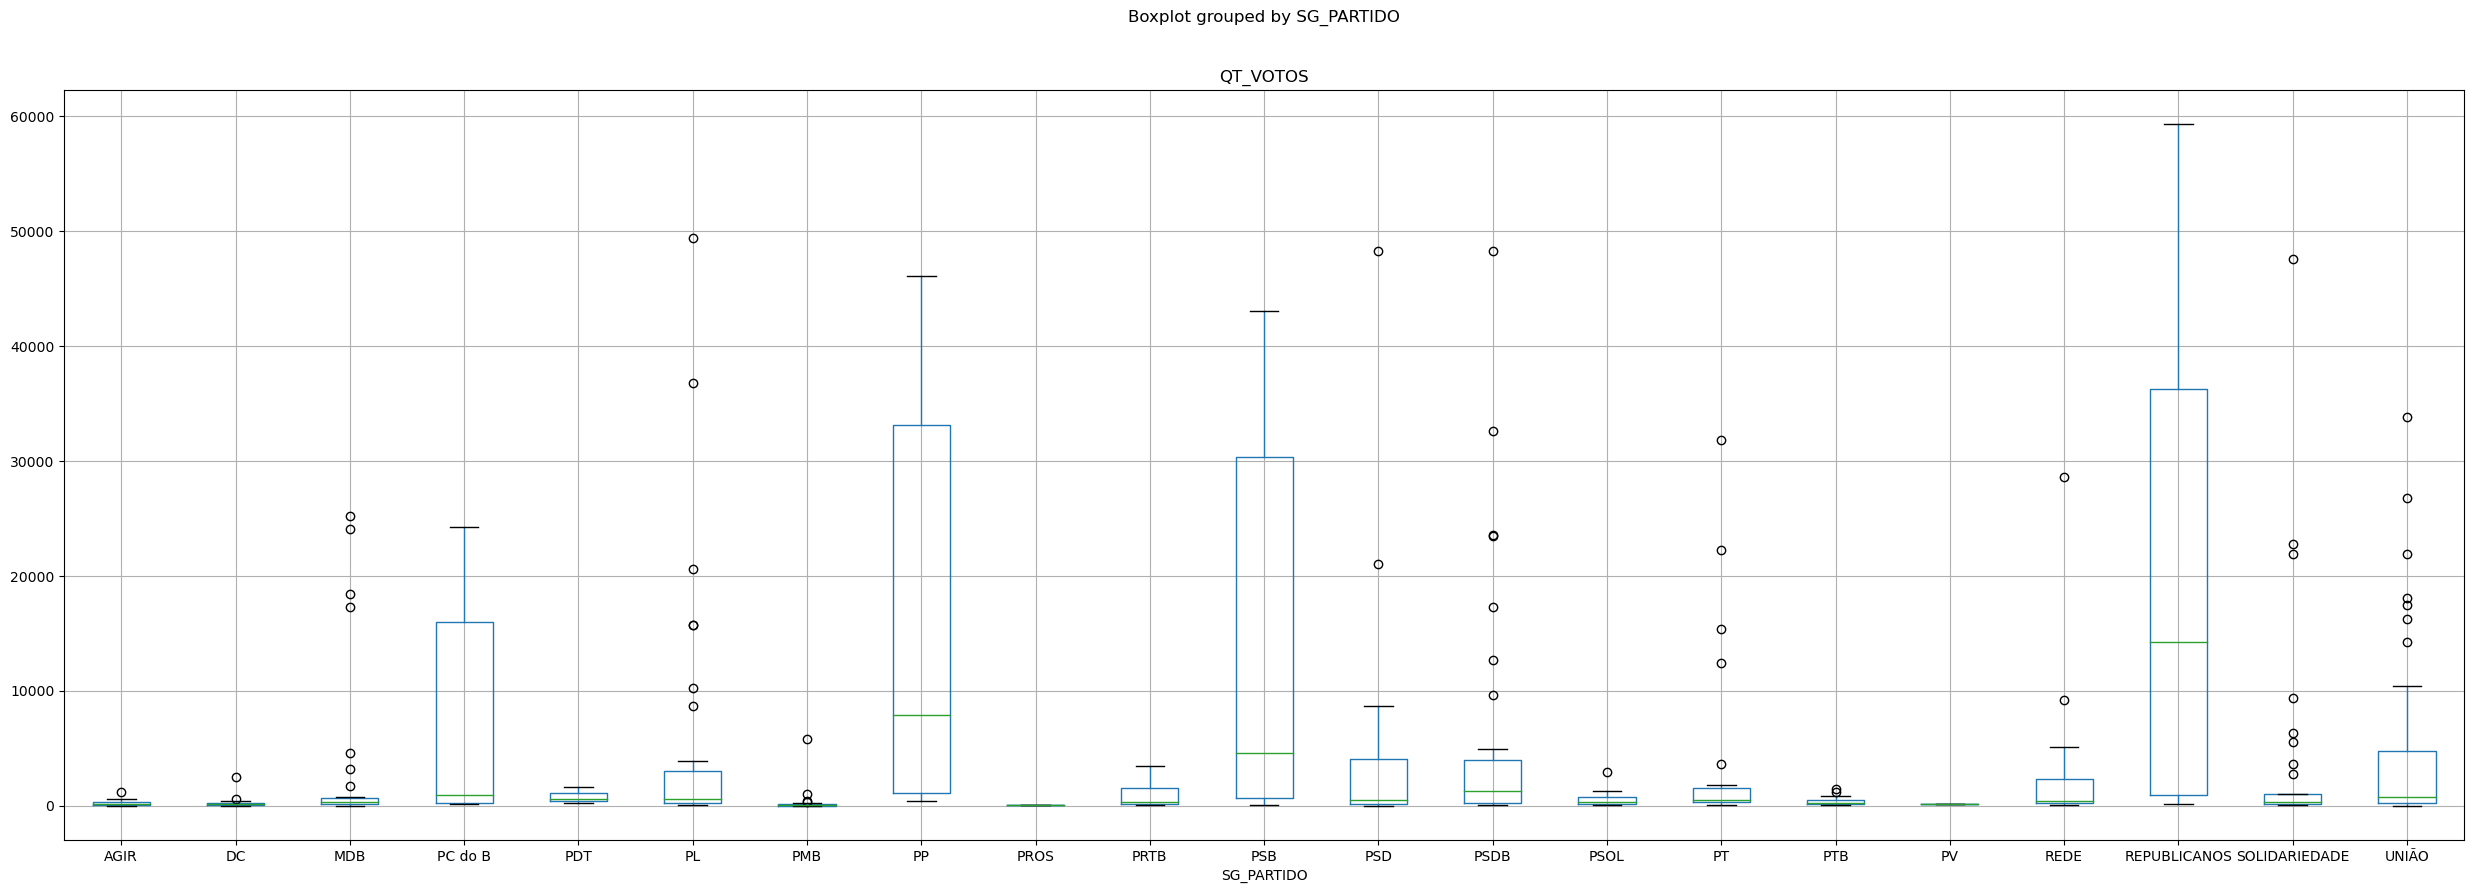

In [119]:
ax = candidatos.boxplot(by='SG_PARTIDO',
  column='QT_VOTOS', figsize=(30, 10))

#### 1.4.4 Medidas de centralidade e variância por partido

* Republicanos

In [120]:
republicanos = candidatos[candidatos['SG_PARTIDO']=='REPUBLICANOS']
media = np.mean(republicanos['QT_VOTOS'])
mediana = np.median(republicanos['QT_VOTOS'])
moda = mode(republicanos['QT_VOTOS'])
variancia = np.var(republicanos['QT_VOTOS'])
desvio_padrao = np.std(republicanos['QT_VOTOS'])

resultados = (
    "Medidas de Centralidade:\n"
    f"Média: {media:.2f}\n"
    f"Mediana: {mediana}\n"
    f"Moda: {moda}\n\n"
    "Medidas de Dispersão:\n"
    f"Variância: {variancia:.2f}\n"
    f"Desvio Padrão: {desvio_padrao:.2f}\n"
)
print(resultados)

Medidas de Centralidade:
Média: 18874.23
Mediana: 14220.5
Moda: 33272.0

Medidas de Dispersão:
Variância: 369437364.81
Desvio Padrão: 19220.75



* PSB

In [121]:
psb = candidatos[candidatos['SG_PARTIDO']=='PSB']
media = np.mean(psb['QT_VOTOS'])
mediana = np.median(psb['QT_VOTOS'])
moda = mode(psb['QT_VOTOS'])
variancia = np.var(psb['QT_VOTOS'])
desvio_padrao = np.std(psb['QT_VOTOS'])

resultados = (
    "Medidas de Centralidade:\n"
    f"Média: {media:.2f}\n"
    f"Mediana: {mediana}\n"
    f"Moda: {moda}\n\n"
    "Medidas de Dispersão:\n"
    f"Variância: {variancia:.2f}\n"
    f"Desvio Padrão: {desvio_padrao:.2f}\n"
)
print(resultados)

Medidas de Centralidade:
Média: 13919.14
Mediana: nan
Moda: 42087.0

Medidas de Dispersão:
Variância: 283689138.57
Desvio Padrão: 16843.07



* PP

In [122]:
pp = candidatos[candidatos['SG_PARTIDO']=='PP']
media = np.mean(pp['QT_VOTOS'])
mediana = np.median(pp['QT_VOTOS'])
moda = mode(pp['QT_VOTOS'])
variancia = np.var(pp['QT_VOTOS'])
desvio_padrao = np.std(pp['QT_VOTOS'])

resultados = (
    "Medidas de Centralidade:\n"
    f"Média: {media:.2f}\n"
    f"Mediana: {mediana}\n"
    f"Moda: {moda}\n\n"
    "Medidas de Dispersão:\n"
    f"Variância: {variancia:.2f}\n"
    f"Desvio Padrão: {desvio_padrao:.2f}\n"
)
print(resultados)

Medidas de Centralidade:
Média: 16015.93
Mediana: 7916.5
Moda: 5974.0

Medidas de Dispersão:
Variância: 290633856.78
Desvio Padrão: 17047.99



* PSDB

In [123]:
psdb = candidatos[candidatos['SG_PARTIDO']=='PSDB']
media = np.mean(psdb['QT_VOTOS'])
mediana = np.median(psdb['QT_VOTOS'])
moda = mode(psdb['QT_VOTOS'])
variancia = np.var(psdb['QT_VOTOS'])
desvio_padrao = np.std(psdb['QT_VOTOS'])

resultados = (
    "Medidas de Centralidade:\n"
    f"Média: {media:.2f}\n"
    f"Mediana: {mediana}\n"
    f"Moda: {moda}\n\n"
    "Medidas de Dispersão:\n"
    f"Variância: {variancia:.2f}\n"
    f"Desvio Padrão: {desvio_padrao:.2f}\n"
)
print(resultados)

Medidas de Centralidade:
Média: 5913.79
Mediana: 1231.5
Moda: 163.0

Medidas de Dispersão:
Variância: 116201055.10
Desvio Padrão: 10779.66



* União

In [124]:
uniao = candidatos[candidatos['SG_PARTIDO']=='UNIÃO']
media = np.mean(uniao['QT_VOTOS'])
mediana = np.median(uniao['QT_VOTOS'])
moda = mode(uniao['QT_VOTOS'])
variancia = np.var(uniao['QT_VOTOS'])
desvio_padrao = np.std(uniao['QT_VOTOS'])

resultados = (
    "Medidas de Centralidade:\n"
    f"Média: {media:.2f}\n"
    f"Mediana: {mediana}\n"
    f"Moda: {moda}\n\n"
    "Medidas de Dispersão:\n"
    f"Variância: {variancia:.2f}\n"
    f"Desvio Padrão: {desvio_padrao:.2f}\n"
)
print(resultados)

Medidas de Centralidade:
Média: 5516.81
Mediana: nan
Moda: 445.0

Medidas de Dispersão:
Variância: 81160073.71
Desvio Padrão: 9008.89



* PL

In [125]:
pl = candidatos[candidatos['SG_PARTIDO']=='PL']
media = np.mean(pl['QT_VOTOS'])
mediana = np.median(pl['QT_VOTOS'])
moda = mode(pl['QT_VOTOS'])
variancia = np.var(pl['QT_VOTOS'])
desvio_padrao = np.std(pl['QT_VOTOS'])

resultados = (
    "Medidas de Centralidade:\n"
    f"Média: {media:.2f}\n"
    f"Mediana: {mediana}\n"
    f"Moda: {moda}\n\n"
    "Medidas de Dispersão:\n"
    f"Variância: {variancia:.2f}\n"
    f"Desvio Padrão: {desvio_padrao:.2f}\n"
)
print(resultados)

Medidas de Centralidade:
Média: 5285.29
Mediana: nan
Moda: 15703.0

Medidas de Dispersão:
Variância: 117498536.33
Desvio Padrão: 10839.67



### 1.5 Análise por escolaridade

#### 1.5.1 Quantidade de candidatos por grau de escolaridade

In [126]:
candidatos[['DS_GRAU_INSTRUCAO']].value_counts()

DS_GRAU_INSTRUCAO            
SUPERIOR COMPLETO                217
ENSINO MÉDIO COMPLETO            147
SUPERIOR INCOMPLETO               39
ENSINO FUNDAMENTAL COMPLETO       27
ENSINO FUNDAMENTAL INCOMPLETO     15
ENSINO MÉDIO INCOMPLETO           14
LÊ E ESCREVE                       2
Name: count, dtype: int64

#### 1.5.2 Verificando a quantidade de candidatos eleitos por grau de escolaridade

In [127]:
escolaridadeEleitas = eleitos_qt_media['DS_GRAU_INSTRUCAO'].value_counts()
print(escolaridadeEleitas)

DS_GRAU_INSTRUCAO
SUPERIOR COMPLETO                29
SUPERIOR INCOMPLETO               3
ENSINO MÉDIO COMPLETO             3
ENSINO FUNDAMENTAL INCOMPLETO     1
Name: count, dtype: int64


#### 1.5.3 Média dos dados importantes entre os candidatos por grau de escolaridade

In [128]:
disc_media = dados_selecionados.groupby(["DS_GRAU_INSTRUCAO"]).mean('QT_VOTOS').apply(lambda x: round(x, 2))
print(disc_media)

                               NR_IDADE_DATA_POSSE  QT_VOTOS  VR_RECEITA  \
DS_GRAU_INSTRUCAO                                                          
ENSINO FUNDAMENTAL COMPLETO                  51.04    494.39    14058.88   
ENSINO FUNDAMENTAL INCOMPLETO                49.67   3075.17    57769.11   
ENSINO MÉDIO COMPLETO                        46.10   1716.55    43722.95   
ENSINO MÉDIO INCOMPLETO                      44.64    926.71    28028.94   
LÊ E ESCREVE                                 54.50    494.50    12550.00   
SUPERIOR COMPLETO                            48.40   7903.91   118687.41   
SUPERIOR INCOMPLETO                          43.28   4585.34   101444.81   

                               VR_BEM_CANDIDATO  
DS_GRAU_INSTRUCAO                                
ENSINO FUNDAMENTAL COMPLETO           234704.00  
ENSINO FUNDAMENTAL INCOMPLETO         156833.25  
ENSINO MÉDIO COMPLETO                1877460.30  
ENSINO MÉDIO INCOMPLETO               262108.23  
LÊ E ESCREVE   

##### Gráfico 1.4

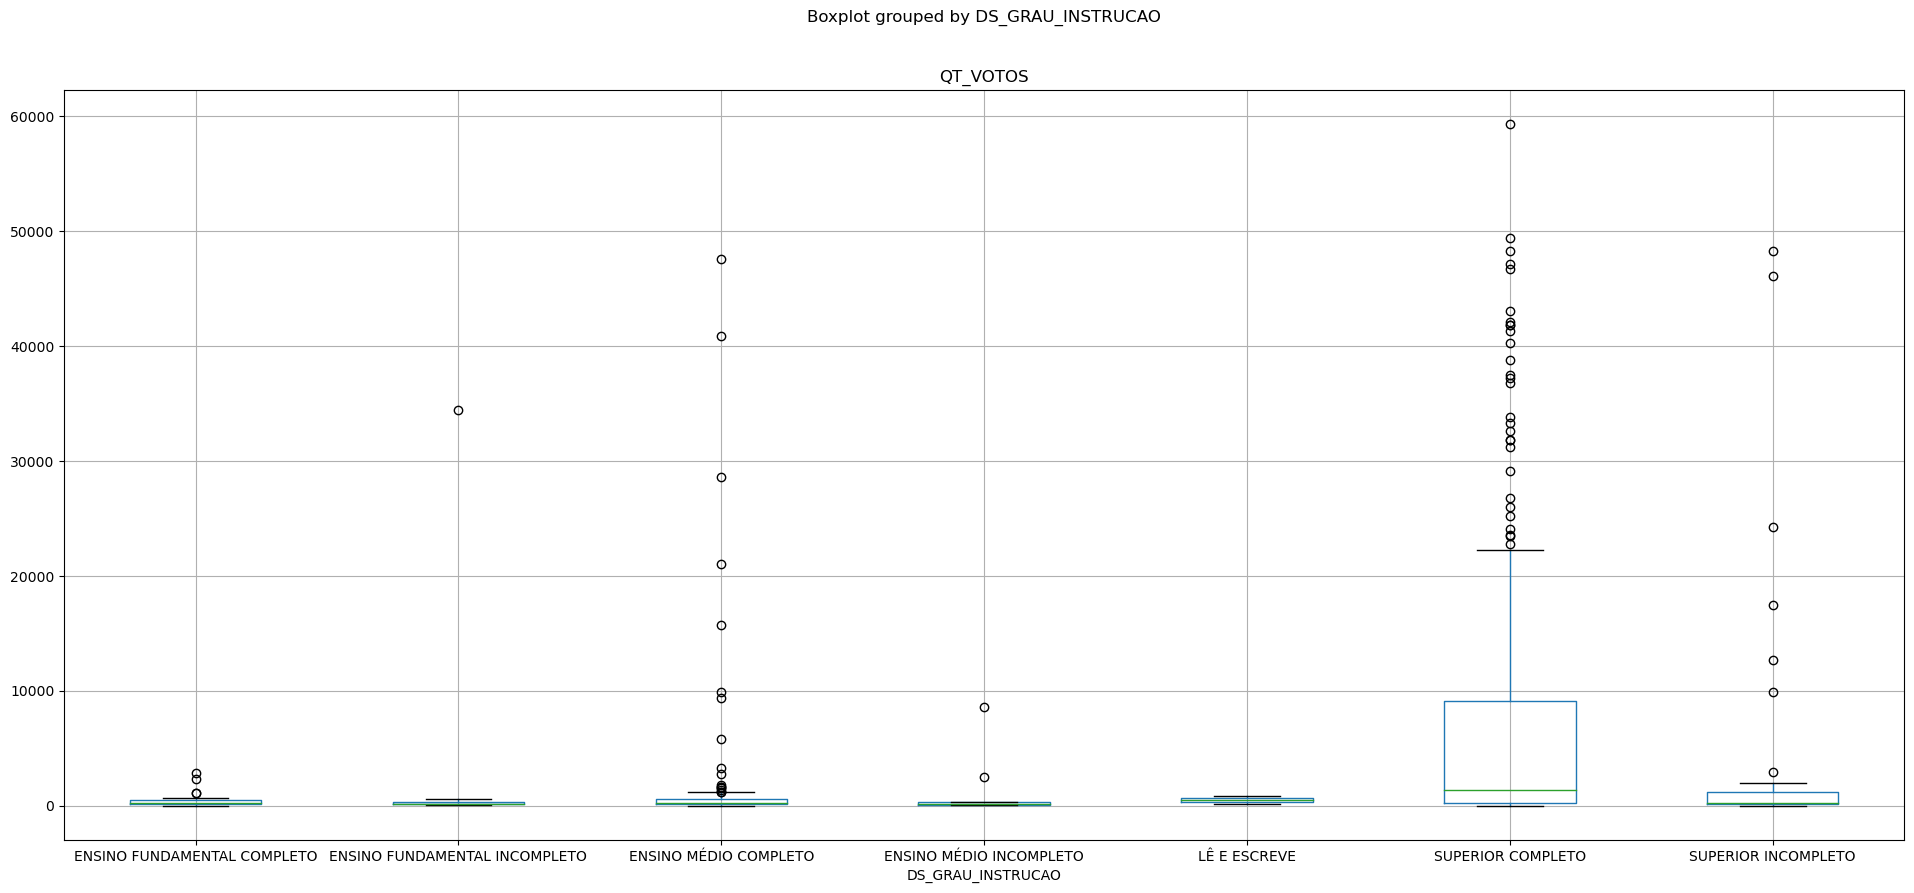

In [129]:
ax = candidatos.boxplot(by='DS_GRAU_INSTRUCAO',
  column='QT_VOTOS', figsize=(23, 10))

#### 1.5.4 Medidas de centralidade e variância por grau de escolaridade

* Superior completo

In [130]:
superCompleto = candidatos[candidatos['DS_GRAU_INSTRUCAO']=='SUPERIOR COMPLETO']
media = np.mean(superCompleto['QT_VOTOS'])
mediana = np.median(superCompleto['QT_VOTOS'])
moda = mode(superCompleto['QT_VOTOS'])
variancia = np.var(superCompleto['QT_VOTOS'])
desvio_padrao = np.std(superCompleto['QT_VOTOS'])

resultados = (
    "Medidas de Centralidade:\n"
    f"Média: {media:.2f}\n"
    f"Mediana: {mediana}\n"
    f"Moda: {moda}\n\n"
    "Medidas de Dispersão:\n"
    f"Variância: {variancia:.2f}\n"
    f"Desvio Padrão: {desvio_padrao:.2f}\n"
)
print(resultados)

Medidas de Centralidade:
Média: 7903.91
Mediana: nan
Moda: 3.0

Medidas de Dispersão:
Variância: 168013275.23
Desvio Padrão: 12961.99



* Superior incompleto

In [131]:
superincompleto = candidatos[candidatos['DS_GRAU_INSTRUCAO']=='SUPERIOR INCOMPLETO']
media = np.mean(superincompleto['QT_VOTOS'])
mediana = np.median(superincompleto['QT_VOTOS'])
moda = mode(superincompleto['QT_VOTOS'])
variancia = np.var(superincompleto['QT_VOTOS'])
desvio_padrao = np.std(superincompleto['QT_VOTOS'])

resultados = (
    "Medidas de Centralidade:\n"
    f"Média: {media:.2f}\n"
    f"Mediana: {mediana}\n"
    f"Moda: {moda}\n\n"
    "Medidas de Dispersão:\n"
    f"Variância: {variancia:.2f}\n"
    f"Desvio Padrão: {desvio_padrao:.2f}\n"
)
print(resultados)

Medidas de Centralidade:
Média: 4585.34
Mediana: nan
Moda: 232.0

Medidas de Dispersão:
Variância: 127008342.23
Desvio Padrão: 11269.80



* Ensino Médio completo

In [132]:
medioCompleto = candidatos[candidatos['DS_GRAU_INSTRUCAO']=='ENSINO MÉDIO COMPLETO']
media = np.mean(medioCompleto['QT_VOTOS'])
mediana = np.median(medioCompleto['QT_VOTOS'])
moda = mode(medioCompleto['QT_VOTOS'])
variancia = np.var(medioCompleto['QT_VOTOS'])
desvio_padrao = np.std(medioCompleto['QT_VOTOS'])

resultados = (
    "Medidas de Centralidade:\n"
    f"Média: {media:.2f}\n"
    f"Mediana: {mediana}\n"
    f"Moda: {moda}\n\n"
    "Medidas de Dispersão:\n"
    f"Variância: {variancia:.2f}\n"
    f"Desvio Padrão: {desvio_padrao:.2f}\n"
)
print(resultados)

Medidas de Centralidade:
Média: 1716.55
Mediana: nan
Moda: 79.0

Medidas de Dispersão:
Variância: 39669268.77
Desvio Padrão: 6298.35



* Ensino fundamental incompleto

In [133]:
fundIncompleto = candidatos[candidatos['DS_GRAU_INSTRUCAO']=='ENSINO FUNDAMENTAL INCOMPLETO']
media = np.mean(fundIncompleto['QT_VOTOS'])
mediana = np.median(fundIncompleto['QT_VOTOS'])
moda = mode(fundIncompleto['QT_VOTOS'])
variancia = np.var(fundIncompleto['QT_VOTOS'])
desvio_padrao = np.std(fundIncompleto['QT_VOTOS'])

resultados = (
    "Medidas de Centralidade:\n"
    f"Média: {media:.2f}\n"
    f"Mediana: {mediana}\n"
    f"Moda: {moda}\n\n"
    "Medidas de Dispersão:\n"
    f"Variância: {variancia:.2f}\n"
    f"Desvio Padrão: {desvio_padrao:.2f}\n"
)
print(resultados)

Medidas de Centralidade:
Média: 3075.17
Mediana: nan
Moda: 163.0

Medidas de Dispersão:
Variância: 89522686.31
Desvio Padrão: 9461.64



## 2 Análise das relações entre variáveis

Faça uma análise das relações entre as variáveis em questão. Você pode começar
com uma análise gráfica das relações entre variáveis, para depois partir para
análise de correlação. Explique se existem variáveis com forte impacto no número de votos e na chance do candidato ser eleito.

### 2.1 Averiguando se existe alguma correlação entre o número de votos e a receita gasta na campanha

Para essa análise usaremos o metódo linear para averiguar se há alguma correlação entre essas duas variáveis. A seguir o *Gráfico 2.1* para termos uma representação visual dessa análise.

#### Gráfico 2.1

c:\Users\bruns\anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


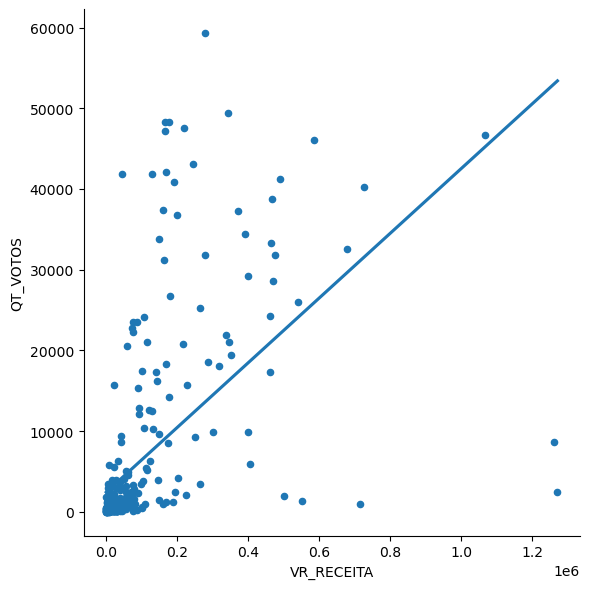

In [134]:
sns.lmplot(
    data=candidatos, x="VR_RECEITA", y="QT_VOTOS",
    palette="muted", ci=None, height=6, scatter_kws={"s": 20, "alpha": 1}
)

É perceptível que a quantidade de dinheiro investido na campanha influencia diretamente na quantidade de votos recebidos, com os candidatos recebendo mais votos quando investem mais em sua campanha. Adiante, usaremos outros métodos de análise para termos maior precisão na análise.

In [135]:
pd.Series({
    'pearson': candidatos.VR_RECEITA.corr(candidatos.QT_VOTOS, method='pearson'),
    'spearman': candidatos.VR_RECEITA.corr(candidatos.QT_VOTOS, method='spearman'),
    'kendall': candidatos.VR_RECEITA.corr(candidatos.QT_VOTOS, method='kendall')
}, name='correlacao').to_frame()


,correlacao
pearson,0.561157
spearman,0.716357
kendall,0.521898


Analisando os dados com os métodos Pearson, Kendall e Spearman chegamos aos seguintes resultados:

* A correlação Pearson indica que há uma correlação positiva moderada entre os dados, pois o resultado está entre 0,5 e 0,7;

* A correlação Spearman mostra haver uma correlação positiva forte entre os dados, pois o resultado está entre 0,7 e 1;

* A correlação Kendall aponta uma média concordância entre as duas variáveis, pois seu valor está entre 0,5 e 1.

Em resumo, esses valores indicam que há uma média relação positiva entre as duas variáveis, sendo mais forte segundo o método de Spearman, seguido por Pearson e depois Kendall.

### 2.2 Verificando se há alguma relação entre os bens dos candidatos e os a quantidade de votos recebidos

Inicialmente usaremos o metódo linear para investigar se há alguma correlação entre essas duas variáveis. A seguir o *Gráfico 2.1* para termos uma representação visual dessa análise.

#### Gráfico 2.2

c:\Users\bruns\anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


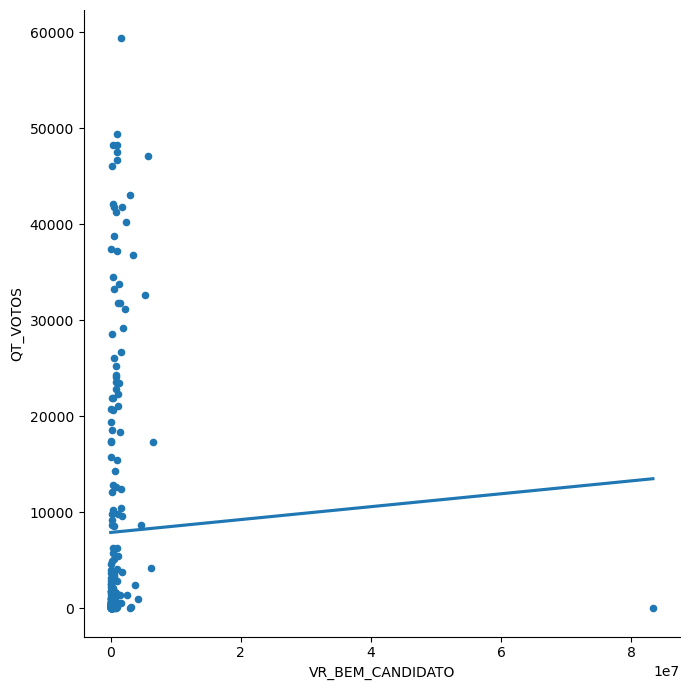

In [136]:
sns.lmplot(
    data=candidatos, x="VR_BEM_CANDIDATO", y="QT_VOTOS",
    palette="muted", ci=None, height=7, scatter_kws={"s": 20, "alpha": 1}
)

É notório que não há uma relação concreta entre as variáveis, fazendo com que seja difícil concluir se a quantidade de bens do candidato influencia diretamente na quantidade de votos que ele recebeu. Para termos uma conclusão mais precisa, utilizaremos outros métodos de análise.

In [137]:
pd.Series({
    'pearson': candidatos.VR_BEM_CANDIDATO.corr(candidatos.QT_VOTOS, method='pearson'),
    'spearman': candidatos.VR_BEM_CANDIDATO.corr(candidatos.QT_VOTOS, method='spearman'),
    'kendall': candidatos.VR_BEM_CANDIDATO.corr(candidatos.QT_VOTOS, method='kendall')
}, name='correlacao').to_frame()


,correlacao
pearson,0.027539
spearman,0.443874
kendall,0.302850


Analisando os dados com os métodos Pearson, Kendall e Spearman chegamos aos seguintes resultados:

* A correlação Pearson está muito baixa, indicando uma correlação quase inexistente entre as duas variáveis, pois o resultado está abaixo de 0,1;

* A correlação Spearman está mais alta que a Pearson, mostrando que há uma relação crescente e decrescente entre as variáveis, mas não necessáriamente linear, entretanto, a relação ainda é baixa, pois seu valor está em 0,3 e 0,5;

* A correlação Kendall aponta uma baixa concordância entre as duas variáveis, pois seu valor está entre 0,3 e 1.

Em resumo, esses valores indicam que há uma baixa relação entre as duas variáveis, sendo incorreto afirmar com propriedade que uma variável influencia diretamente a outra.

### 2.3 Investigando se a idade dos candidatos influencia a quantidade de dinheiro gasto na campanha

Inicialmente utilizaremos uma análise linear para verificar se há alguma relação entre essas duas variáveis. A seguir o *Gráfico 2.3* demonstra visualmente o resultado dessa análise.

#### Gráfico 2.3

c:\Users\bruns\anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


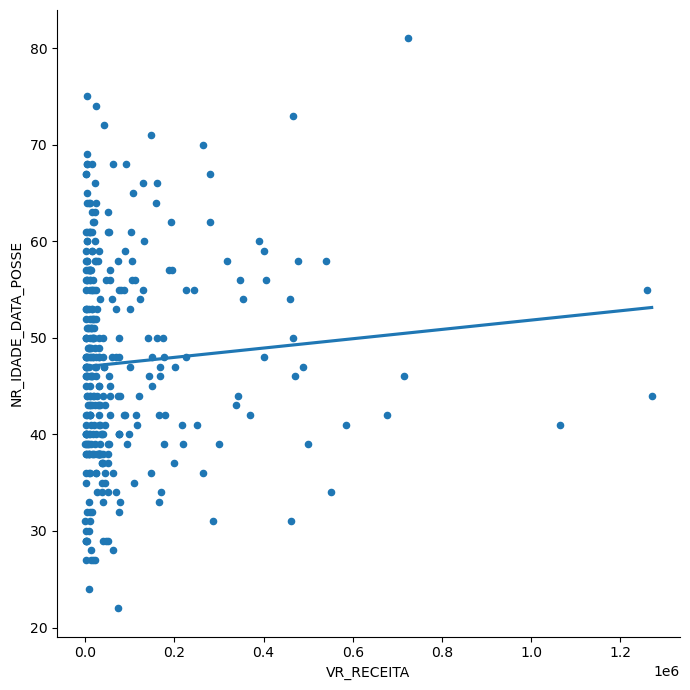

In [138]:
sns.lmplot(
    data=candidatos, x="VR_RECEITA", y="NR_IDADE_DATA_POSSE",
    palette="muted", ci=None, height=7, scatter_kws={"s": 20, "alpha": 1}
)

Não é possível concluir nada a partir da análise linear feita para analisar se haveria alguma correlação entre as variáveis, portanto, iremos partir para outros métodos de análise para vê se conseguimos concluir algo.

In [139]:
pd.Series({
    'pearson': candidatos.VR_RECEITA.corr(candidatos.NR_IDADE_DATA_POSSE, method='pearson'),
    'spearman': candidatos.VR_RECEITA.corr(candidatos.NR_IDADE_DATA_POSSE, method='spearman'),
    'kendall': candidatos.VR_RECEITA.corr(candidatos.NR_IDADE_DATA_POSSE, method='kendall')
}, name='correlacao').to_frame()

,correlacao
pearson,0.074681
spearman,0.018691
kendall,0.009950


Analisando os dados com os métodos Pearson, Kendall e Spearman chegamos aos seguintes resultados:

* A correlação Pearson está muito baixa, indicando uma correlação quase inexistente entre as duas variáveis, pois o resultado está abaixo de 0,1;

* A correlação Spearman está mais baixa que a Pearson, mostrando que há uma correlação ainda mais fraca entre as variáveis;

* A correlação Kendall aponta uma concordância inexistente entre as duas variáveis, pois seu valor está abaixo de 0,1.

Em resumo, esses valores indicam que não há uma relação entre as duas variáveis, sendo impossível dizer que uma variável influencia diretamente a outra.


## 3 Análise de regressão 

Analise a relação entre a quantidade de votos que um candidato recebe com outras variáveis. Você pode começar com regressão linear simples, considerando apenas uma variável por vez, e depois fazer regressão múltipla. Descreva bem as suas conclusões, de forma clara para um público geral.


### 3.1 Analisando se é possivel prever a quantia de receita gasta ideal para um candidato se eleger numa campanha

Vamos iniciar com uma análise de regressão linear e vê que resultados obtivemos: 

In [140]:
predictors = ['QT_VOTOS']
outcome = 'VR_RECEITA'

imputer = SimpleImputer(strategy='mean')
candidatos_imputed = candidatos.copy()
candidatos_imputed[predictors + [outcome]] = imputer.fit_transform(candidatos[predictors + [outcome]])

model = LinearRegression()
model.fit(candidatos_imputed[predictors], candidatos_imputed[outcome])

print(f'b0 (intercept): {model.intercept_:.2f}')
print(f'b1 (coefficient): {model.coef_[0]:.2f}')

b0 (intercept): 47853.20
b1 (coefficient): 7.50


Neste caso foi necessário imputar alguns valores NAN e fazê-los se adequarem à média dos dados, caso contrário não daria para fazer a análise, dito isso, vamos vê os resultados que obtivemos:
* b0 representa o valor da receita gasta na campanha quando o número de votos recebidos for igual a zero, sendo a base de gastos iniciais do candidato. O resultado da análise sugere que precisa-se ter muito mais que 47853 para se obter um voto;

* b1 representa a inclinação da linha de regressão, sendo seu valor 7,50. Isso significa que para cada voto recebido, espera-se um aumento de R$7,50 reais no valor da receita do candidato.

A seguir iremos avaliar o modelo e averiguar sua precição:

In [141]:
candidatos_imputed = candidatos.copy()
imputer = SimpleImputer(strategy='mean')
candidatos_imputed['QT_VOTOS'] = imputer.fit_transform(candidatos_imputed[['QT_VOTOS']])
candidatos_imputed['VR_RECEITA'] = imputer.fit_transform(candidatos_imputed[['VR_RECEITA']])

fitted = model.predict(candidatos_imputed[predictors])
RMSE = np.sqrt(mean_squared_error(candidatos_imputed[outcome], fitted))
r2 = r2_score(candidatos_imputed[outcome], fitted)
print(f'Root Mean Square Error (RMSE): {RMSE:.0f}')
print(f'Coefficient of determination (r2): {r2:.4f}')

Root Mean Square Error (RMSE): 118986
Coefficient of determination (r2): 0.3006


Para essa análise também foi necessário imputar os valores NAN para que o código pudesse funcionar perfeitamente, dito isso, vamos averiguar quão preciso é o modelo criado:
* RMSE é uma medida da diferença entre os valores observados e os valores previstos pelo modelo. No contexto atual, o RMSE ser 118986 é péssimo, pois sugere uma grande discrepância entre os valores reais e os previstos pelo modelo.

* R2 é uma medida que indica a proporção da variabilidade na variável de resposta (VR_RECEITA) que é explicada pelo modelo. Neste caso, o valor de 0,3006 indica que cerca de 30.06% da variabilidade na receita de campanha é explicada pelas variáveis preditoras incluídas no modelo.

Com isso, concluímos que é difícil prever um gasto ideal de receita para um candidado poder ser eleito, sugerindo que outras variáveis também influenciam no eleição de um candidato.